# GEO3466 Practical 1 Estimating primary production in the ocean using satellite data

## Overview of the Practical

In this practical we will learn how to estimate primary production in the ocean using an available-light model of photosynthesis, by making some assumptions on the parameters of the photosynthesis irradiance equation, and using two input variables that can be derived from satellite ocean-colour data: the chlorophyll-a concentration (a measure of phytoplankton biomass, denoted $B$) and photosynthetically available radiation (PAR).

## Aims of the Practical and Intended Learning Outcomes

This practical aims to teach the concepts of primary production modelling, and show how we can use satellite data together with simple models to estimate primary production over wide areas. As an outcome of this practical you will be able to

1. Understand what controls primary production
2. Estimate primary production using satellite data
3. Become a more experienced python coder

## Python packages required for the practical

Please note that this practical is designed such that each cell (block of Python code) is run after the previous cell. If you clear or restart the practical, you will need to run through each cell from the start. 

Please run the following lines of code to ensure you have the right packages installed for the practical. To do this click on the code (cell) below and then click the run button at the top of the page. 

In [1]:
#Import all packages required for practical
import numpy as np
import math as mt
import array as arr 
import scipy.integrate as spi
from matplotlib import pyplot as plt 
from matplotlib import ticker as cm
from matplotlib.colors import LogNorm  
from netCDF4 import Dataset

## Definition of primary production

Primary production is defined as the conversion of inorganic carbon (from carbon dioxide) into organic carbon using light as the energy source. In the ocean it is expressed in terms of mass of carbon converted (fixed) per unit volume of water per unit time. For a more detailed description of primary production please refer to Lecture 3 of the module: "Primary production by phytoplankton".

## Simple models of primary production
### Biomass-normalised primary production

In computing primary production ($P$) it is common to work with the biomass-normalised primary production variable ($P^B$), where $B$ refer to the biomass of phytoplankton which in this exercise we take to be the chlorophyll-a concentration, such that 

\begin{equation}
P = B \times P^B,
\end{equation}

and 

\begin{equation}
P^B = \frac{P}B.
\end{equation}


By doing this, we can focus our efforts on modelling $P^B$, and use $B$ to scale between $P^B$ and $P$. This is useful in the context of satellite remote sensing as fields of $B$ are available through satellite ocean colour. 

Let us start with a very simple example. 

Hypothetically, let say we went out on a research ship and measured $P^B$ at a location in the North Atlantic to be 3 (mg C (mg $B$)$^{−1}$ h$^{-1}$). At the same location, on the same day, a satellite estimated $B$ (mg m$^{-3}$) at 9 pixels (pixel size 1 km, covering an area of 3 $\times$ 3 km, 9 km$^2$) surrounding the location of the ship. Let’s compute primary production for each of the nine pixels in the area around the ship.

Run the following lines of Python code for the example.

In [2]:
#Biomass of phytoplankton (Chlorophyll-a concentration) for 9 pixels 
#surrounding the ship
B  = [0.5,0.6,0.8,0.9,1.2,1.4,0.8,0.7,1.0]

#Create an array the same length as B, and fill with the 
#biomass-normalised primary production measured on the ship (3.0)
PB = np.full(len(B), 3.0)

#Compute primary production at each of the 9 pixels and print results
P  = PB * B
print(P)

[1.5 1.8 2.4 2.7 3.6 4.2 2.4 2.1 3. ]


Having computed primary production for the nine pixels we can average and compute the standard deviation of the region surrounding the ship. Run the following lines of Python code.

In [3]:
#Compute mean of 9 pixels
P_av = np.mean(P)

#Compute standard deviation of 9 pixels
P_sd = np.std(P)

#Print results
print(P_av) 
print(P_sd)

2.6333333333333333
0.809663853432741


The average primary production surrounding the ship is therefore 2.6 (mg C m$^{-3}$ h$^{-1}$) with a standard deviation of 0.8 (mg C m$^{-3}$ h$^{-1}$).

### Available-light models of biomass-normalised primary production

The biomass-normalised primary production can be expressed using an available light model (Platt et al. 1980), such that

\begin{equation}
P^B = P^B_m(1-\exp(-\frac{\alpha^BI}{P^B_m})),
\end{equation}

where $P^B_m$ is the assimilation number of the light-saturation curve (maximum photosynthetic rate normalised by biomass in the absence of photoinhibition), $\alpha^B$ is the initial slope, and $I$ is the total available irradiance (which we take to be the photosynthetically available radiation, PAR). For simplicity we have not included the effect of photoinhibition, which can occur in nature (Platt et al. 1980).

Let us see how this equation looks graphically using python. Run the following lines of Python code.

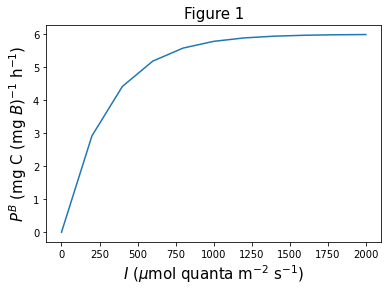

In [4]:
#Create an array of light values in μmol m−2 s−1
I = arr.array('f', [0.,200.,400.,600.,800.,1000.,1200.,1400.,1600.,1800.,2000.])

#Define the parameters (assimilation number assumed to be 6.0 and initial slope 0.02)
PB_M = 6.0
AL_B = 0.02

#Compute biomass-normalised primary production by looping through the light values
#Define vector
PB  = np.full([len(I)],0.0)
#Looping through the light values 
for k in range(len(I)):
    PB[k] = PB_M*(1. - mt.exp(- (AL_B/PB_M) * I[k]))

# Plot biomass-normalised primary production as a function of light
plt.plot(I, PB) 
# naming the x axis 
plt.xlabel('$I$ ($\mu$mol quanta m$^{−2}$ s$^{−1}$)', fontsize=15) 
# naming the y axis 
plt.ylabel('$P^B$ (mg C (mg $B$)$^{-1}$ h$^{-1}$)', fontsize=15) 
# Plot title
plt.title("Figure 1", fontsize=15) 
# function to show the plot 
plt.show()

As demonstrated in Figure 1, $P^B$ initially increases linearly with light as a function of the initial slope ($\alpha^B$) until the mid-point of the curve (known as the photoadaptation parameter ($I_k$), computed as $P^B_{m}/\alpha^B$) after which production progressively saturates with increasing light until it reaches its maximum value ($P^B_{m}$). This classical relationship (Platt et al. 1980) lies at the heart of models of ocean primary production.

In this example we assume $P^B_{m}$ = 6.0 (mg C m$^{-3}$ (mg $B$)$^{-1}$ h$^{-1}$) and $\alpha^B$ = 0.02 (mg C (mg $B$)$^{-1}$ h$^{-1}$ ($\mu$mol quanta m$^{-2}$ s$^{-1}$)$^{-1}$). In the natural environment, $P^B_{m}$ typically ranges between 0.2 to 25 mg C m$^{-3}$ (mg $B$)$^{-1}$ h$^{-1}$) and $\alpha^B$ 0.005 to 0.2. In the code above, change values for these parameters (named as PB_M for $P^B_{m}$ and AL_B for $\alpha^B$), re-run the code and see how the figure changes. 

### Assumptions of our model of primary production

In the above sections, we have introduced all the key components required to compute primary production: the chlorophyll-a concentration ($B$), light ($I$), and the assimilation number ($P^B_{m}$) and initial slope ($\alpha^B$) of the light-saturation curve (Figure 1). However, these components are not static, but vary in time and depth, and with wavelength in the case of $I$ and $\alpha^B$.

For the sake of simplicity, in this practical we make the following assumptions:

- We deal with total light (PAR), without taking into account spectral variations in light or the spectral selectivity in absorption and utilisation of light for photosynthesis.
- The chlorophyll-a concentration ($B$), the assimilation number ($P^B_{m}$) and inital slope ($\alpha^B$) remains constant over the period of one day.
- The chlorophyll-a concentration ($B$), the assimilation number ($P^B_{m}$) and inital slope ($\alpha^B$) are constant with depth. This follows the case of a vertically homogeneous water column (no deep chlorophyll-a maximum), and assumes phytoplankton are adapted to the average light conditions in sun-lit region of the ocean).

In reality, there are clear cases where these assumptions do not hold. However, there are situations where it is reasonable to make these assumptions. One important factor to consider however, when modelling primary production, is variations in light with time ($t$) over the day period, and depth ($z$). 

Following our asummptions, can express primary production as 

\begin{equation}
P(z,t) = {B P^B_m[1-\exp(-\frac{\alpha^BI(z,t)}{P^B_{m}})]},
\end{equation}

To solve this equation, we need estimates of $I(z,t)$.

### Variations in light with depth and time

Photosynthetically available radiation (PAR) is a standard product produced by space agencies (see https://modis.gsfc.nasa.gov/data/dataprod/par.php. It represents total available irradiance from 400 to 700 nanometers just above the water surface. This value is typically provided by space agencies in Einstein m$^{-2}$ d$^{-1}$, representing integrated irradiance over the daylength ($D$). 

To go from PAR to $I(z,t)$, we convert PAR from Einstein m$^{-2}$ d$^{-1}$ into $\mu$mol m$^{-2}$ d$^{-1}$, then estimate the surface maximum irradiance just above the water surface ($I_m(0+)$) at mid-day according to 

\begin{equation}
\label{Eq_12}
I_m(0+) = \frac{\text{PAR}/2}{D}\pi,
\end{equation}

where $D$ is daylength (in seconds). To account for the transmission of light at the air-sea water interface, we subtract 2% (reflected light) from $I_m(0+)$ to get from above to below water ($I_m(0-)$). This number (2%) is relatively constant for sun-zenith angles from 0 to 40$^{\circ}$, typically observed at local noon in the tropics, but increases with sun-zenith angle and is impacted by wind speed (another assumption we need to consider).

Having derived $I_m(0-)$, the values of irradiance $I(0-,t)$ at various time steps ($t$) during the day, just below the air-sea interface, can then be computed according to 

\begin{equation}
I(0-,t) = I_m(0-) \sin(\frac{\pi t}{D}),
\end{equation}

For each time step ($t$), variations in $I$ with depth ($z$) are modelled according to the Beer-Lambert Law, such that

\begin{equation}
\label{Eq_14}
I(z,t) = I(0-,t)\exp[-K_dz],
\end{equation}

where $K_d$ is the diffuse attenuation coefficient for PAR. The value of $K_d$ is dependent on the optical properties of the water, and is a product provided as standard by space agencies and covaries with $B$ in open-ocean waters. In cases of a non-uniform profile of phytoplankton, $K_d$ will vary with depth. But following our assumption of a homogeneous water column, in this practical, we can make the assumption of a constant $K_d$ (as we did with $B$).

Let us see how these equation looks graphically using python. Run the following lines of Python code.

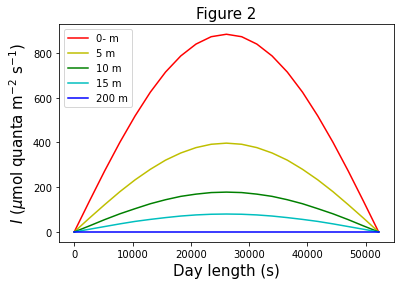

In [5]:
#For a hypothetical satellite pixel (40 degrees N and in May)
Latitude = 40.
dayOfYear= 140.                                                                                                                                                                                                                            
PAR      = 30.0 
Kd       = 0.08

#PAR from Einstein to micro mole
PAR      = PAR * 1000000.

#Compute daylength (D) from latitude and day of year
#Deigned for lower latitudes (<60 degrees N or S) but used here for
#illustrative purposes
sdec     = mt.asin(0.39795*mt.cos(0.2163108 + 2*mt.atan(0.9671396* \
           mt.tan(0.00860*(dayOfYear-186)))))
theta    = (mt.sin(0.8333*mt.pi/180.) + mt.sin(Latitude*mt.pi/180.)*\
           mt.sin(sdec))/(mt.cos(Latitude*mt.pi/180.)*mt.cos(sdec))
if theta < -1.0:
    theta = -0.999
if theta > 1.0:
    theta = 0.999
D        = (24. - (24./mt.pi)*mt.acos(theta)) * 3600.

#Surface maximum irradiance just above and below the water surface
Im_pl    = (PAR/2.)/D*mt.pi
Im_mn    = Im_pl - ((Im_pl/100.)*2)

#Array of Time over the day (21 steps) and depth (to 200m, 21 steps)
Time     = np.full(21, (range(21)))*(D/20.)
Depth    = np.full(21, (range(21)))*10

#Surface irradiance over the day and depth
#Define vector
Im_mn_t  = np.full([21,21],0)
#Looping through time and depth to compute light
for k in range(len(Time)):
    for j in range(len(Depth)):
        Im_mn_t[k,j]  = Im_mn*mt.sin((mt.pi*Time[k])/D) * mt.exp(-Kd*Depth[j])
        
# Plot light as a function of time step for different depths
plt.plot(Time, Im_mn_t[:,0],color='r', label='0- m')
plt.plot(Time, Im_mn_t[:,1],color='y', label='5 m')
plt.plot(Time, Im_mn_t[:,2],color='g', label='10 m')
plt.plot(Time, Im_mn_t[:,3],color='c', label='15 m')
plt.plot(Time, Im_mn_t[:,20],color='b', label='200 m')
#Import legend
plt.legend(loc="upper left")
# naming the x axis 
plt.xlabel('Day length (s)', fontsize=15) 
# naming the y axis 
plt.ylabel('$I$ ($\mu$mol quanta m$^{−2}$ s$^{−1}$)', fontsize=15) 
# Plot title
plt.title("Figure 2", fontsize=15) 
# function to show the plot 
plt.show()

As you can see in Figure 2, we have now computed the light environment ($I$) for different times ($t$) of the day (minimum dawn and dusk, maximum at noon), and for a variety of depths ($z$). It is important to note in this example that our conversion from a (cloud-corrected) satellite estimate of PAR (light integrated over the day) into values of instantaneous light assumes no fluctuations in clouds over the day, which of course is not always realistic. 

Have a play with different inputs (changing Latitude, doOfYear, PAR and Kd) and re-run the code. For a realistic range, values typically vary in the open ocean between:

- latitude (-90 to 90)
- dayOfYear (1 to 366)
- PAR (1 to 70)
- Kd (0.02 to 0.2)

Note how the light environment is controlled by where you are (latitude) on Earth, the time of year (season), and of course the intensity of light (PAR), and how attenuates with depth ($K_d$).

### Computation of primary production 

Having computed our light environment, we are now in a position to compute primary production at a specific time ($t$) and depth ($z$), as shown in the previous equation shown again here for clarity

\begin{equation}
P(z,t) = {B P^B_m[1-\exp(-\frac{\alpha^BI(z,t)}{P^B_{m}})]}.
\end{equation}

Let us use this equation in python and look graphically at the output. Before we do this, and to keep our simulations realistic, we will empirically relate $K_d$ to $B$ using the equation of Morel et al. (2007). This follow the classical Case 1 assumption that in the open ocean, the optical properties of the water are controlled by phytoplankton and their covarying material (detrital and dissolved substances). Note there are satellite algorithms that estimate $B$ and $K_d$ independently, but for the sake of consistency in our model, we will tie these two variables to avoid unrealistic simulations (e.g. where $B$ is high but $K_d$ low). Following Morel et al. (2007) we can approximate $K_d$ according to

\begin{equation}
\label{Eq_3}
K_d = \frac{4.6}{10^{[q_a + q_b\log_{10}(B) + q_c\log_{10}(B)^2 + q_d\log_{10}(B)^3]}},
\end{equation}

where $q_a$ = 1.524, $q_b$ = 0.436, $q_c$ = 0.0145 and $q_d$ =0.0186 are empirical coefficients. Note, there are other equations we can use to relate $B$ and $K_d$, the Morel et al. (2007) one was just selected for convenience. 

To compute primary production with time ($t$) and depth ($z$), run the following lines of Python code.

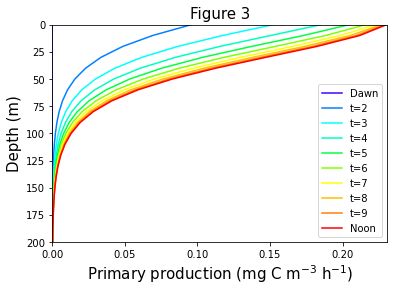

In [6]:
#For a hypothetical satellite pixel (20 degrees N and in May)
Latitude = 20. 
dayOfYear= 140.                                                                                                                                                                                                                            
PAR      = 30.
B        = 0.04  

#Define photosynthesis parameters (assimilation number assumed to 
#be 6.0 and initial slope 0.02)
PB_M     = 6.0
AL_B     = 0.02 

#Estimate Kd from B using Morel equation
Kd       =  4.6 / 10.**(1.524 - 0.436*mt.log10(B) - \
            0.0145*mt.log10(B)**2. + 0.0186*mt.log10(B)**3.) 

#PAR from Einstein m$^{-2}$\,d$^{-1}$ into $\mu$mol m$^{-2}$ d$^{-1}$
PAR      = PAR * 1000000.

#Compute daylength (D) from latitude and dayofyear
sdec     = mt.asin(0.39795*mt.cos(0.2163108 + 2*mt.atan(0.9671396* \
           mt.tan(0.00860*(dayOfYear-186)))))
theta    = (mt.sin(0.8333*mt.pi/180.) + mt.sin(Latitude*mt.pi/180.)*\
           mt.sin(sdec))/(mt.cos(Latitude*mt.pi/180.)*mt.cos(sdec))   
if theta < -1.0:
    theta = -0.999
if theta > 1.0:
    theta = 0.999
D        = (24. - (24./mt.pi)*mt.acos(theta)) * 3600.

#Surface maximum irradiance just above the water surface and just below
Im_pl    = (PAR/2.)/D*mt.pi
Im_mn    = Im_pl - ((Im_pl/100.)*2)

#Set time steps over the day and depth resolution (to 200m)
Time     = np.full(21, (range(21)))*(D/20.)
Depth    = np.full(21, (range(21)))*10

################Compute Primary Production############################### 
#Define vector for primary production
P_t_z    = np.full([21,21],0.0)
#Loop through time and depth
for l in range(len(Time)):
    for m in range(len(Depth)):
        #Compute light
        Im_mn_t   = Im_mn*mt.sin((mt.pi*Time[l])/D)*mt.exp(-Kd*Depth[m])
        #Compute primary production
        P_t_z[l,m]= PB_M*(1. - mt.exp(- (AL_B/PB_M) * Im_mn_t))*B 
    
################Plot Primary Production################################# 
plt.plot(P_t_z[0,:], Depth, color='#4000ff', label='Dawn')
plt.plot(P_t_z[1,:], Depth, color='#0080ff', label='t=2')         
plt.plot(P_t_z[2,:], Depth, color='#00ffff', label='t=3') 
plt.plot(P_t_z[3,:], Depth, color='#00ffbf', label='t=4') 
plt.plot(P_t_z[4,:], Depth, color='#00ff40', label='t=5') 
plt.plot(P_t_z[5,:], Depth, color='#80ff00', label='t=6') 
plt.plot(P_t_z[6,:], Depth, color='#ffff00', label='t=7') 
plt.plot(P_t_z[7,:], Depth, color='#ffbf00', label='t=8') 
plt.plot(P_t_z[8,:], Depth, color='#ff8000', label='t=9')  
plt.plot(P_t_z[9,:], Depth, color='#ff0000', label='Noon') 

#Import array
plt.legend(loc="lower right")

# naming the x axis 
plt.xlabel('Primary production (mg C m$^{−3}$ h$^{−1}$)', fontsize=15) 
# naming the y axis 
plt.ylabel('Depth (m)', fontsize=15) 
# Plot title
plt.title("Figure 3", fontsize=15) 
plt.axis([0,np.max(P_t_z),max(Depth),min(Depth)])
# function to show the plot 
plt.show()

Figure 3 shows output from running the code, from dawn to noon (note noon to dusk will give symmetric output for this modelling approach). As you can see, primary production changes as light changes over the course of the day.

Have a play by varying input parameters (latitude, dayOfYear, PAR, B, PB_M, and AL_B), re-running the code and see how the graph changes. For guidance here are some realistic bounds to play with

- latitude (-90 to 90)
- dayOfYear (1 to 366)
- PAR (1 to 70)
- B (0.02 to 30.)
- PB_M (0.2 to 20)
- AL_B (0.006 to 0.1)

This will give you a feel for how variable primary production can be in the ocean. 

### Integrating primary production

Having produced a model that can compute primary production over a range of depths, and times of day, it is common to integrate the values over depth and daylength, to provide the value of primary production in units of mg C m$^{-2}$ d$^{-1}$. In such cases the primary production model is expressed as  

\begin{equation}
P = \int_{t=0}^{D}\int_{z=0}^{200 m}BP^B_{m}[1-\exp(-\frac{\alpha^BI(z,t)}{P^B_{m}})] dz dt.
\end{equation}

Here we are integrating down to 200 m depth, which we consider to be the base of the sunlit ocean. Rather than taking a fixed boundary like we have done, others use a variable boundary, such as the euphotic zone (1% light level), which changes with the optical properties of the water. Common integration methods used for such purposes include trapezoid integration, which we shall use here.

To integrate the previous primary production simulations data, run the following lines of Python code.

In [7]:
#To integrate we will use the trapz function 
#that does trapezoid integration

#First we start by integrating over depth for each time step
#We define a vector for integrate P over depth for each time step
P_int_z = np.full([len(Time)],0.0)

#Next loop though the times and integrate over depth
for k in range(len(Time)):
    P_int_z[k] = spi.trapz(P_t_z[k,:],Depth)

#Next we integrate these values over the day
#This needs to be done in hourly values (as the units of production are per hour)
#Therefore time (which is currently in seconds) is divided by 3600 to go to hours
P_int   = spi.trapz(P_int_z,(Time/3600.))
    
#We print the daily integrated output
print(P_int)

98.25815035790741


We now have all the components in place to compute daily integrated primary production at a satellite pixel, based on PAR and chlorophyll-a ($B$) input. 

Further integrations can be conducted in time and space, for example, application of primary production models at global scale suggest phytoplankton produce around 50 Gt C y$^{-1}$ (Kulk et al. 2020). This computation involves integrating further in space (over the global ocean) and time (over the annual cycle).  

## Changes in primary production over the season

One of the advantages of satellite remote sensing, is the temporal acquisition of data over the full seasonal cycle. 

Here we illustrate the application of our primary production model to a time-series of satellite data, extracted from weekly composites (8-day averages) of $B$ and PAR at a location in the North Atlantic. 

Run the following lines of Python code.

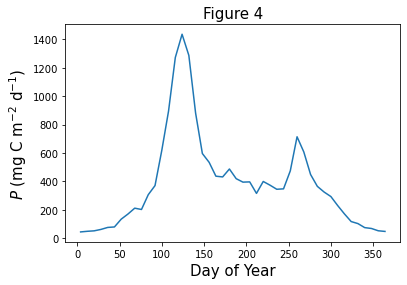

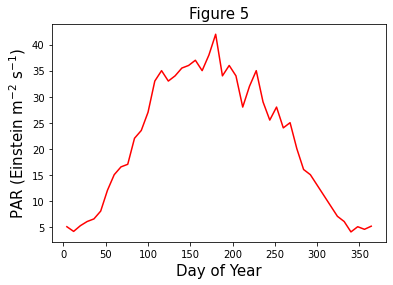

In [8]:
############Variables########################
#Timeseries of day of year
dayOfYear_MAT = ((np.array(range(46))+1) * 8.0)-4.0

#Satellite Chlorophyll-a timeseries (example taken from Modis-Aqua)
B_MAT         = np.array([0.10,0.15,0.12,0.13,0.16,0.13, \
                 0.18,0.20,0.25,0.22,0.32,0.4, \
                 0.80,1.20,2.00, 2.50,2.00,1.00, \
                 0.50,0.40,0.30,0.27,0.30,0.29,\
                 0.25,0.27,0.23,0.30,0.25,0.27, \
                 0.32,0.5,1.2,0.9,0.70,0.65, \
                 0.59,0.60,0.50,0.40,0.30,0.30, \
                 0.31,0.2,0.15,0.11])

#Satellite PAR timeseires (example taken from Modis-Aqua)
PAR_MAT       = np.array([ 5.0, 4.1, 5.2, 6.0, 6.5, 8.0,12.0,\
                 15.0,16.5,17.0,22.0,23.5,27.0,33.0,\
                 35.0,33.0,34.0,35.5,36.0,37.0,35.0,\
                 38.0,42.0,34.0,36.0,34.0,28.0,32.0,\
                 35.0,29.0,25.5,28.0,24.0,25.0,20.0,\
                 16.0,15.0,13.0,11.0, 9.0, 7.0, 6.0,\
                 4.0,5.0,4.5,5.1])


#Compute Primary production (first create zero matrix size of B)
P_int       = B_MAT*0.00
#Next loop though the dates
for k in range(len(dayOfYear_MAT)):
    #Only run code on data where you have values
    if B_MAT[k] > 0.:
        if PAR_MAT[k] > 0.:
            #Define P and I parameters
            PB_M      = 6.00000
            AL_B      = 0.02000
            #Day of year (taken as the mid-point of the week) and lat
            dayOfYear = dayOfYear_MAT[k]
            Latitude  = 50.000
            #Input variables
            B         = B_MAT[k]
            PAR       = PAR_MAT[k] * 1000000.
            Kd        = 4.6 / 10.**(1.524 - 0.436*mt.log10(B) - \
                            0.0145*mt.log10(B)**2. + 0.0186*mt.log10(B)**3.)
            #compute daylength
            sdec     = mt.asin(0.39795*mt.cos(0.2163108 + 2\
                       *mt.atan(0.9671396*mt.tan(0.00860*(dayOfYear-186.)))))
            theta    = (mt.sin(0.8333*mt.pi/180.) + mt.sin(Latitude*mt.pi/180.)\
                        *mt.sin(sdec))/(mt.cos(Latitude*mt.pi/180.)*mt.cos(sdec))
            if theta < -1.0:
                theta = -0.999
                if theta > 1.0:
                    theta = 0.999
            D        = (24. - (24./mt.pi)*mt.acos(theta)) * 3600.  
            #Surface maximum irradiance 
            Im_pl    = (PAR/2.)/D*mt.pi
            Im_mn    = Im_pl - ((Im_pl/100.)*2)
            #Set time steps over the day and depth resolution (to 200m)
            Time     = np.full(21, (range(21)))*(D/20.)
            Depth    = np.full(21, (range(21)))*10
            P_t_z    = np.full([21,21],0.0)
            #Loop through time and depth and compute primary production
            for l in range(len(Time)):
                for m in range(len(Depth)):
                    #Compute light
                    Im_mn_t   = Im_mn*mt.sin((mt.pi*Time[l])/D) \
                                *mt.exp(-Kd*Depth[m])
                    #Compute primary production
                    P_t_z[l,m]= PB_M*(1. - mt.exp(- (AL_B/PB_M) * \
                                Im_mn_t))*B   
            #We define a vector for integrate P over depth for each timestep
            P_int_z = np.full([len(Time)],0.0)
            #Next loop though the times and integrate over depth
            for n in range(len(Time)):
                P_int_z[n] = spi.trapz(P_t_z[n,:],Depth)
            #Next we integrate these values over the day   
            #This needs to be done in hourly values
            #Therefore time is divided by 3600
            P_int[k]   = spi.trapz(P_int_z,(Time/3600.))          

#Plot the seasonal cycle of primary production at the location
plt.plot(dayOfYear_MAT, P_int)
# naming the x axis 
plt.xlabel('Day of Year', fontsize=15) 
# naming the y axis 
plt.ylabel('$P$ (mg C m$^{-2}$ d$^{-1}$)', fontsize=15) 
# Plot title
plt.title("Figure 4", fontsize=15) 
# function to show the plot 
plt.show()

#Plot the seasonal cycle of PAR
plt.plot(dayOfYear_MAT, PAR_MAT, color = 'r')
# naming the x axis 
plt.xlabel('Day of Year', fontsize=15) 
# naming the y axis 
plt.ylabel('PAR (Einstein m$^{−2}$ s$^{−1}$)', fontsize=15) 
# Plot title
plt.title("Figure 5", fontsize=15) 
# function to show the plot 
plt.show()


Figure 4 shows the output from running the primary production model on a time-series of satellite data in the North Atlantic. This time-series is characteristic of subpolar regions. 
- Primary production is low in winter because of low irradiance (PAR, see Figure 5).
- In spring, PAR increases and the mixed-layer shoals causing an increase in phytoplankton biomass $B$ and primary production (known as the spring bloom).
- As spring moves into summer, phytoplankton biomass $B$ and primary production decrease even though light is high, this is because the nutrients get depleted and zooplankton graze on the phytoplankton.
- In autumn, zooplankton grazing declines and intermittent storms stir the water column and introduce nutrients back in surface waters. This can cause a brief fall bloom.
- With the onset of winter, there is a decrease in light reducing primary production.

## Primary production from a satellite image

Now we have our primary production model working, we are going to plot primary production around the southwest of the UK, on the 25th May 2020 using a MODIS-Aqua satellite image. To do this we will download a global (4 km resolution) composite image of 25th May 2020 (day 146 of 2020) of chlorophyll-a ($B$) and PAR from the MODIS Aqua sensor. For this practical, these images have already been downloaded and integrated into the practical using wget software (see below). However, if are interested in learning how to download satellite images, here are a few steps on doing it

- First, you need to register on the Earthdata login (https://urs.earthdata.nasa.gov/users/new) to gain access to the data. Keep you username and password.
- The data used in the practical is located on the NASA website https://oceandata.sci.gsfc.nasa.gov/
- The specific chlorophyll-a ($B$) image we use can be found by clicking on the following link to the NASA website https://oceandata.sci.gsfc.nasa.gov/MODIS-Aqua/L3SMI/2020/146/ and click on the following image "A2020146.L3m_DAY_CHL_chlor_a_4km.nc" (direct link is https://oceandata.sci.gsfc.nasa.gov/ob/getfile/A2020146.L3m_DAY_CHL_chlor_a_4km.nc). If you are logged in, the image should download automatically, if not you may be redirected to the login-page, type in your details and it should download. This image is a global mapped image of chlorophyll-a ($B$).
- The specific PAR image we use can be found by following this link https://oceandata.sci.gsfc.nasa.gov/MODIS-Aqua/L3SMI/2020/146/ and click on the following image "A2020146.L3m_DAY_PAR_par_4km.nc" (direct link is https://oceandata.sci.gsfc.nasa.gov/ob/getfile/A2020146.L3m_DAY_PAR_par_4km.nc). This image is a global mapped image of PAR at the same resolution.

In this practical, we have used software called wget (see https://www.gnu.org/software/wget/) to download the image automatically and put it in the GitHUB folder. This can be seen in the file called postBuild in the GitHub repository. 

We are now going to read these images into Python, extract data for the region of interest, run our primary production model, and plot a map of primary production. 
	
Run the following lines of Python code. This will take a few minutes to run depending on the speed of your machine.

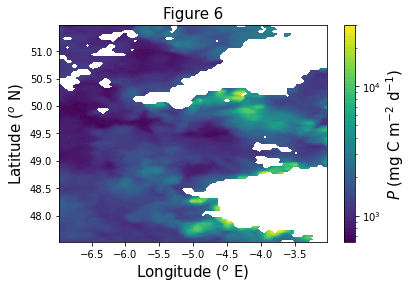

In [9]:
#Read netCDF Chl-a 
CHL_DATA   = 'A2020146.L3m_DAY_CHL_chlor_a_4km.nc'
fh         = Dataset(CHL_DATA, mode='r')
lon        = fh.variables['lon'][:]
lat        = fh.variables['lat'][:]
B_MAT      = fh.variables['chlor_a'][:]
fh.close()

#Read netCDF PAR (note lat and lon are on same grid as Chl-a) 
PAR_DATA   = 'A2020146.L3m_DAY_PAR_par_4km.nc'
fh         = Dataset(PAR_DATA, mode='r')
PAR_MAT    = fh.variables['par'][:]
fh.close()

#Define box of interest
Max_lon    = -3    #16.0 
Min_lon    = -7.   #12.0
Max_lat    = 51.5  #-22. 
Min_lat    = 47.5  #-26.

#Find region of interest 
ind1       = np.squeeze(np.where((lat < Max_lat) & (lat > Min_lat)))
ind2       = np.squeeze(np.where((lon < Max_lon) & (lon > Min_lon)))

#Extract region of interest
B_MAT      = B_MAT[ind1,:][:,ind2]
PAR_MAT    = PAR_MAT[ind1,:][:,ind2]
lat        = lat[ind1]
lon        = lon[ind2]


############Primary production compuations########################
# Primary production (create zero matrix size of B)
P_int       = B_MAT*0.00
# Next loop though the images and integarte to daily production
for k in range(len(ind1)):
    for j in range(len(ind2)):
        if B_MAT[k,j] > 0.:
            if PAR_MAT[k,j] > 0.:
                #Define P and I parameters
                PB_M      = 6.00
                AL_B      = 0.02
                #Day of year (taken as the mid-point of the week) and lat
                dayOfYear = 146.0
                Latitude  = lat[k]
                #Input variables
                B         = B_MAT[k,j]
                PAR       = PAR_MAT[k,j] * 1000000. 
                Kd        = 4.6 / 10.**(1.524 - 0.436*mt.log10(B) - \
                            0.0145*mt.log10(B)**2. + 0.0186*mt.log10(B)**3.)
                #Compute daylength
                sdec     = mt.asin(0.39795*mt.cos(0.2163108 + 2\
                           *mt.atan(0.9671396*mt.tan(0.00860*(dayOfYear-186.)))))
                theta    = (mt.sin(0.8333*mt.pi/180.) + mt.sin(Latitude*mt.pi/180.)\
                            *mt.sin(sdec))/(mt.cos(Latitude*mt.pi/180.)*mt.cos(sdec))
                if theta < -1.0:
                    theta = -0.999
                    if theta > 1.0:
                        theta = 0.999
                D        = (24. - (24./mt.pi)*mt.acos(theta)) * 3600.  
                #Surface maximum irradiance 
                Im_pl    = (PAR/2.)/D*mt.pi
                Im_mn    = Im_pl - ((Im_pl/100.)*2)
                #Set time steps over the day and depth resolution (to 200m)
                Time     = np.full(21, (range(21)))*(D/20.)
                Depth    = np.full(21, (range(21)))*10
                P_t_z    = np.full([21,21],0.0)
                #Loop through times of day
                for l in range(len(Time)):
                    for m in range(len(Depth)):
                        #Compute light environment
                        Im_mn_t  = Im_mn*mt.sin((mt.pi*Time[l])/D) \
                                        *mt.exp(-Kd*Depth[m])
                        #Compute primary production
                        P_t_z[l,m]    = PB_M*(1. - mt.exp(- (AL_B/PB_M) * \
                                        Im_mn_t))*B   
                #We define a vector for integrate P over depth for each timestep
                P_int_z = np.full([len(Time)],0.0)
                #Next loop though the times and integrate over depth
                for n in range(len(Time)):
                    P_int_z[n] = spi.trapz(P_t_z[n,:],Depth)
                #Next we integrate these values over the day
                #This needs to be done in hourly values
                #Therefore time is divided by 3600
                P_int[k,j]   = spi.trapz(P_int_z,(Time/3600.))

# Plot Primary production data
# Set levels
levels=np.logspace(np.log10(np.min(P_int)),np.log10(np.max(P_int)),60)
plt.contourf(lon, lat, P_int, levels, vmin=np.min(P_int), vmax=np.max(P_int), \
             norm=LogNorm())
plt.ylabel('Latitude ($^o$ N)', fontsize=15) 
plt.xlabel('Longitude ($^o$ E)', fontsize=15) 
plt.title("Figure 6", fontsize=15) 
# Add a colorbar
locator = cm.LogLocator(base=10)
cbar = plt.colorbar(ticks=locator)
cbar.set_label('$P$ (mg C m$^{-2}$ d$^{-1}$)', fontsize=15)
plt.show()

Having run the code, Figure 6 shows a map of primary production for the 25th May 2020 around the south-west UK and northern France. Land and clouds are shown in white. High primary production is observed around the coastlines of Plymouth and northern France. We also can see a bloom off the coastline of Plymouth in the English Channel. Primary production varies from around 600 to over 10,000 mg C m$^{−2}$ d$^{−1}$ in the region, at this time of year.

## Further work

Having completed the practical, here are some additional tasks you may want to do in your own time.

- Try plotting different regions of the ocean by changing the bounds "Max_lon", "Min_lon", "Max_lat" and "Min_lat". Note however, the bigger the area, the longer the code will take to run (a complete global image will take a very long time to run). An example that works well on the above image (25th May 2020) is Max_lon = 16.0,  Min_lon = 12.0, Max_lat = -22.0,  Min_lat = -26.0, off the coastline of Namibia.
- Explore the NASA Level 3 browser (https://oceancolor.gsfc.nasa.gov/l3/) and download other data for different periods. Try using 8-day or monthly composites for PAR and Chlorophyll-a as they have less gaps in the data (remember to download the SMI (mapped) .nc data). Remember you will need to change the "dayOfYear" to reflect the period of interest (if monthly or weekly data, select the middle day of the period).
- Try varying model parameters (PB_M and AL_B) and see what results you get. The assumption here is that these parameters are static. There are ways we try and estimate the parameters dynamically from space too, to account for the variability (see for instance Saux-Picart et al. 2014). Ultimately, it would be good to integrate these functions into the code.


## Conclusion

In this practical you have learnt how to estimate primary production in the ocean using an available-light model of photosynthesis. You have used satellite ocean colour data (specifically the chlorophyll-a concentration and photosynthetically available radiation) to map primary production in time (over a seasonal cycle at a specific location) and in space (around the south-west UK). The model is a fairly simple one, and it is important to acknowledge the assumptions in the model when analysing data output. 

You should now have a better understanding of what controls primary production, how to estimate primary production using satellite data, and have now gained more experience as a Python coder.

## References:

Kulk, G., Platt, T., Dingle, J., Jackson, T., Jönsson, B.F., Bouman, H.A., Babin, M., Brewin, R.J., Doblin, M., Estrada, M. & Figueiras, F.G. (2020). Primary Production, an Index of Climate Change in the Ocean: Satellite-Based Estimates over Two Decades. Remote Sensing, 12(5), 826.

Morel, A., Huot, Y., Gentili, B., Werdell, P.J., Hooker, S.B. & Franz, B.A. (2007). Examining the consistency of products derived from various ocean color sensors in open ocean (Case 1) waters in the perspective of a multi-sensor approach. Remote Sensing of Environment, 111(1), 69-88.

Platt, T., Gallegos, C.L. & Harrison, W.G. (1980) Photoinhibition of photosynthesis in natural assemblages of marine phytoplankton. J. Mar. Res., 38, 687-701

Picart, S.S., Sathyendranath, S., Dowell, M., Moore, T. and Platt, T. (2014). Remote sensing of assimilation number for marine phytoplankton. Remote Sensing of Environment, 146, 87-96.

For additional references on the topic, please refer to Lecture 3 of the module.